In [25]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [26]:
model.to("cpu")

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

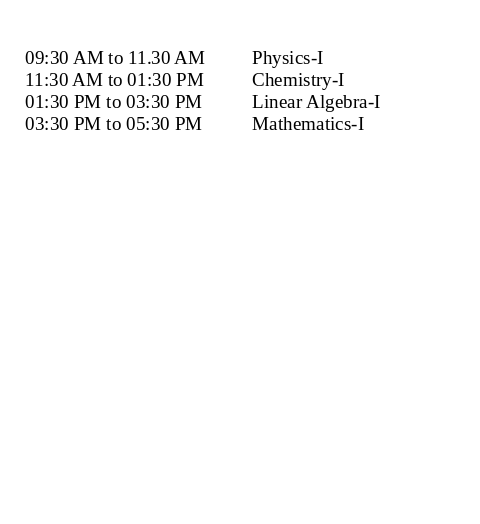

In [27]:
from PIL import Image

image = Image.open("time2.png")
image

In [29]:
import cv2

image = cv2.imread("time2.png")

In [ ]:
inputs = processor(image, return_tensors="pt").pixel_values

In [56]:
question = "When is the Mathematics-I?"

In [57]:
prompt = f"""<s_docvqa><s_question>{question}</s_question><s_answer>"""

In [58]:
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

In [61]:
outputs = model.generate(
    inputs.to("cpu"),
    decoder_input_ids=decoder_input_ids.to("cpu"),
    max_length=model.decoder.config.max_position_embeddings,
    output_scores=True,
    early_stopping=True,
    return_dict_in_generate=True,
    num_beams=1,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
)

In [62]:
import re

seq = processor.batch_decode(outputs.sequences)[0]
seq = seq.replace(processor.tokenizer.eos_token, "")
seq = seq.replace(processor.tokenizer.pad_token, "")
seq = re.sub(r"<.*?>", "", seq, count=1).strip()
print(seq)

<s_question> When is the Mathematics-I?</s_question><s_answer> 03:30 pm to 05:30 pm</s_answer>


In [63]:
processor.token2json(seq)

{'question': 'When is the Mathematics-I?', 'answer': '03:30 pm to 05:30 pm'}